In [1]:
library(effects)

In [1]:
java_code_smells = read.csv("java_code_smells.csv", header = TRUE)
kotlin_code_smells = read.csv("kotlin_code_smells.csv", header = TRUE)

In [2]:
set.seed(37)
df_java_projects_ran <- java_code_smells[sample(nrow(java_code_smells)),]
df_kotlin_projects_ran <- kotlin_code_smells[sample(nrow(kotlin_code_smells)),]

Dividing data sets into training and test data.

In [3]:
df_java_projects_training <- df_java_projects_ran[1:400,]
df_kotlin_projects_training <- df_kotlin_projects_ran[1:400,]

In [4]:
rownames(df_java_projects_training) <- NULL
rownames(df_kotlin_projects_training) <- NULL

In [5]:
head(df_java_projects_training)

Project,LF,LPL,TMM,Total,Lifespan,Issues,LOC,Commits,Contributors,Stargazers
changmingxie/tcc-transaction,3,102,15,120,1086,159,7259,173,8,2775
Tencent/VasSonic,1,67,16,84,481,2,9987,365,19,8824
kbastani/spring-cloud-microservice-example,0,0,1,1,1285,21,1229,51,9,2504
siacs/Conversations,7,390,92,489,1766,331,54505,5483,140,3069
siyamed/android-shape-imageview,0,51,3,54,1547,52,2795,82,5,2286
android-cjj/Android-MaterialRefreshLayout,0,19,9,28,1173,75,3342,90,7,2079


# Correlation Matrices

## Java

In [6]:
java_projects_training_w_projects <- subset(df_java_projects_training, select = c(2,3,4,5,6,7,8,9,10,11))
res <- cor(java_projects_training_w_projects)
round(res, 2)

,LF,LPL,TMM,Total,Lifespan,Issues,LOC,Commits,Contributors,Stargazers
LF,1.00,0.44,0.58,0.56,0.20,0.31,0.61,0.25,0.37,0.12
LPL,0.44,1.00,0.93,0.99,0.27,0.33,0.91,0.76,0.71,0.14
TMM,0.58,0.93,1.00,0.97,0.29,0.45,0.96,0.70,0.73,0.20
Total,0.56,0.99,0.97,1.00,0.28,0.37,0.94,0.74,0.72,0.16
Lifespan,0.20,0.27,0.29,0.28,1.00,0.30,0.28,0.25,0.39,0.17
Issues,0.31,0.33,0.45,0.37,0.30,1.00,0.36,0.16,0.32,0.38
LOC,0.61,0.91,0.96,0.94,0.28,0.36,1.00,0.79,0.77,0.18
Commits,0.25,0.76,0.70,0.74,0.25,0.16,0.79,1.00,0.87,0.12
Contributors,0.37,0.71,0.73,0.72,0.39,0.32,0.77,0.87,1.00,0.30
Stargazers,0.12,0.14,0.20,0.16,0.17,0.38,0.18,0.12,0.30,1.00


## Kotlin

In [7]:
kotlin_projects_training_w_projects <- subset(df_kotlin_projects_training, select = c(2,3,4,5,6,7,8,9,10,11))
res <- cor(kotlin_projects_training_w_projects)
round(res, 2)

,LF,LPL,TMM,Total,Lifespan,Issues,LOC,Commits,Contributors,Stargazers
LF,1.00,0.58,0.24,0.65,0.04,0.06,0.47,0.30,0.09,0.03
LPL,0.58,1.00,0.71,0.99,0.14,0.29,0.71,0.52,0.38,0.06
TMM,0.24,0.71,1.00,0.78,0.19,0.40,0.84,0.75,0.45,0.09
Total,0.65,0.99,0.78,1.00,0.15,0.31,0.78,0.60,0.39,0.07
Lifespan,0.04,0.14,0.19,0.15,1.00,0.21,0.17,0.28,0.24,0.22
Issues,0.06,0.29,0.40,0.31,0.21,1.00,0.35,0.41,0.48,0.13
LOC,0.47,0.71,0.84,0.78,0.17,0.35,1.00,0.83,0.51,0.14
Commits,0.30,0.52,0.75,0.60,0.28,0.41,0.83,1.00,0.64,0.25
Contributors,0.09,0.38,0.45,0.39,0.24,0.48,0.51,0.64,1.00,0.42
Stargazers,0.03,0.06,0.09,0.07,0.22,0.13,0.14,0.25,0.42,1.00


# LOC vs. Smells

## Java

In [8]:
library(devtools)
library(easyGgplot2)

Loading required package: ggplot2


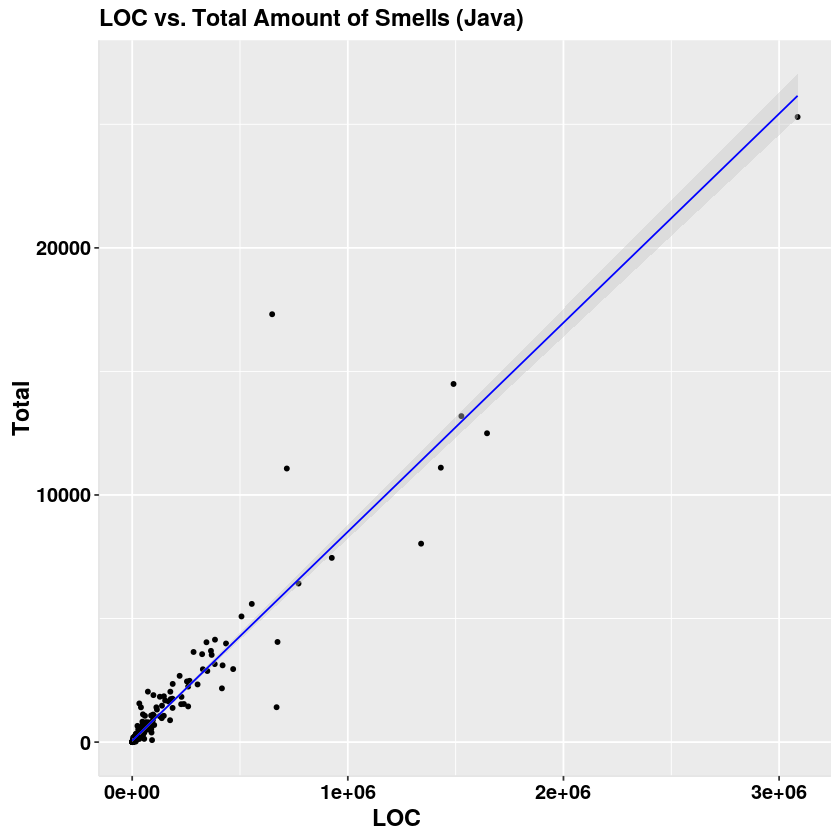

In [9]:
ggplot2.scatterplot(data=df_java_projects_training, xName='LOC',yName='Total',
            addRegLine=TRUE, regLineColor="blue",
            addConfidenceInterval=TRUE) + ggtitle("LOC vs. Total Amount of Smells (Java)")

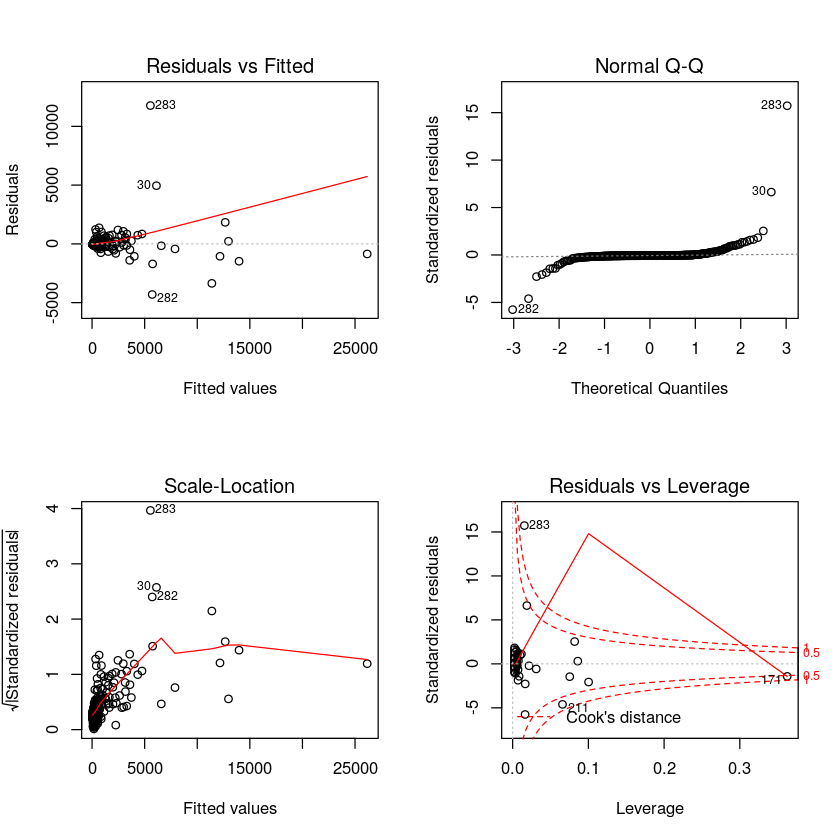

In [10]:
fit <- lm(Total ~ LOC, data=df_java_projects_training)
par(mfrow=c(2,2))
plot(fit)

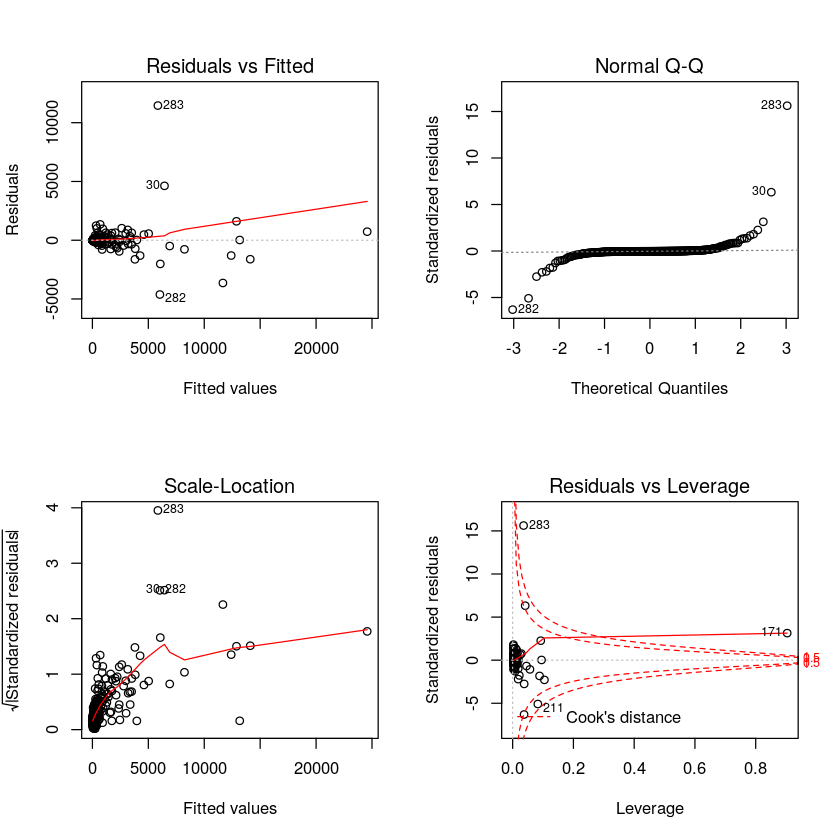

In [11]:
polynomial_fit <- lm(Total ~ LOC + I(LOC^2), data=df_java_projects_training)
par(mfrow=c(2,2))
plot(polynomial_fit)

# Kotlin

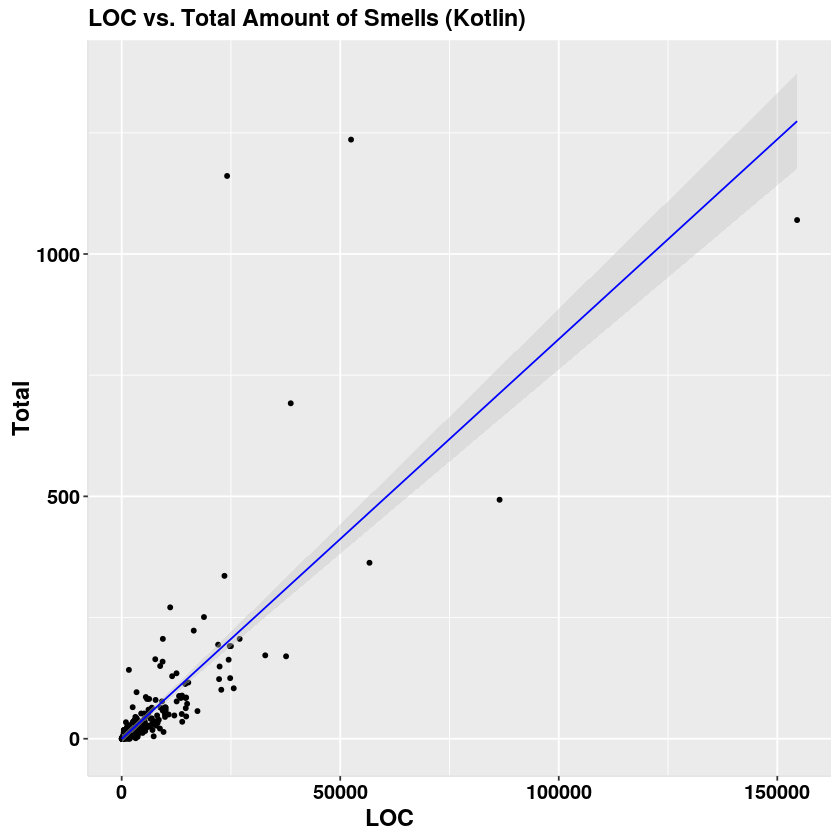

In [12]:
ggplot2.scatterplot(data=df_kotlin_projects_training, xName='LOC',yName='Total',
            addRegLine=TRUE, regLineColor="blue",
            addConfidenceInterval=TRUE) + ggtitle("LOC vs. Total Amount of Smells (Kotlin)")

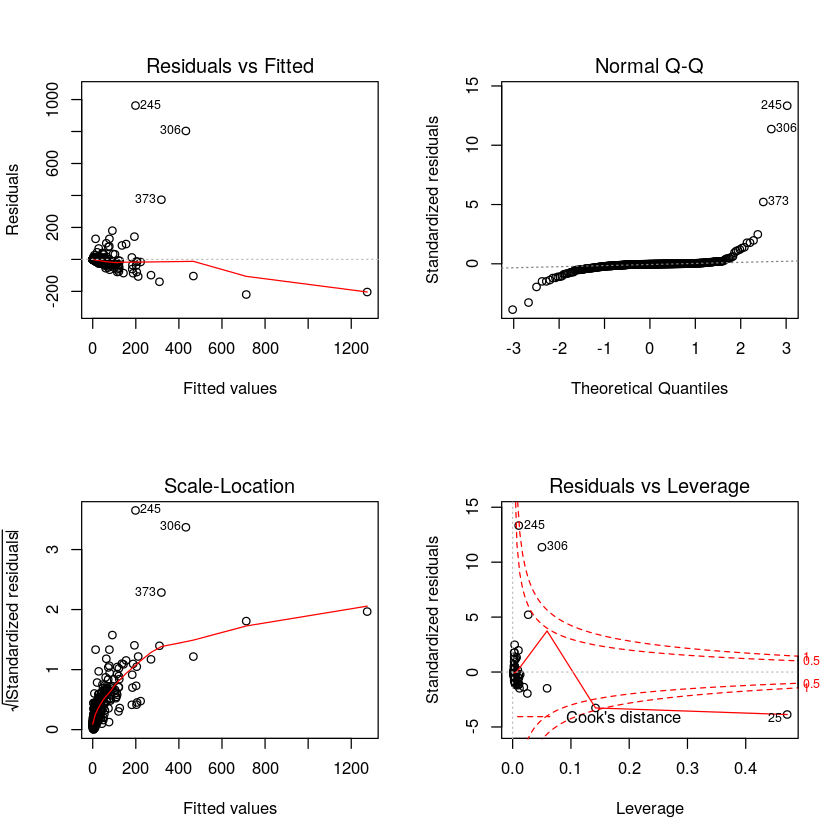

In [13]:
fit <- lm(Total ~ LOC, data=df_kotlin_projects_training)
par(mfrow=c(2,2))
plot(fit)

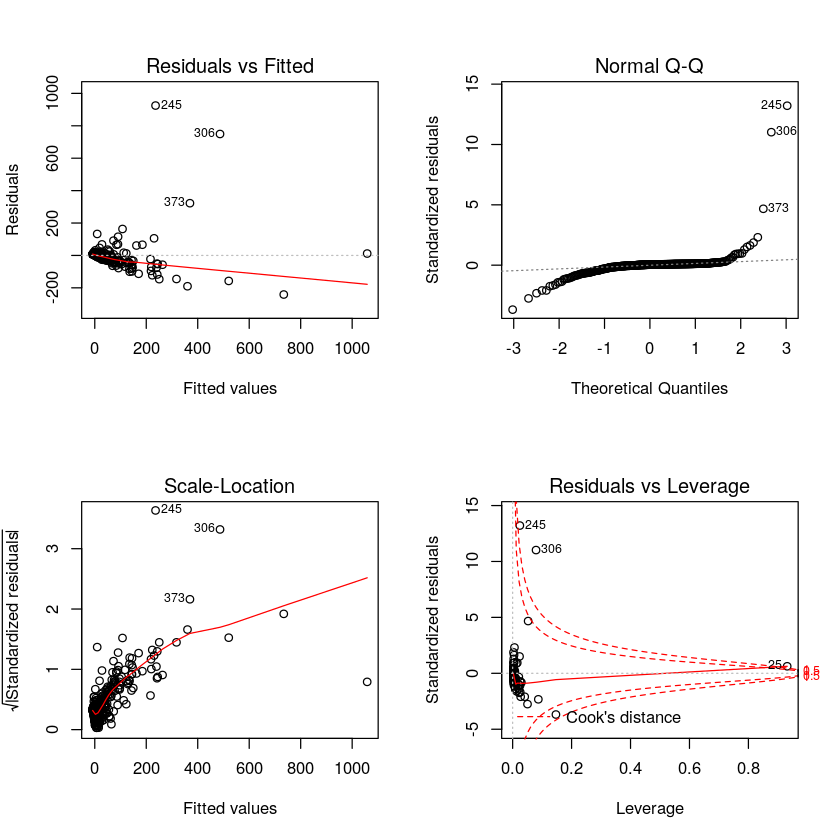

In [14]:
polynomial_fit <- lm(Total ~ LOC + I(LOC^2), data=df_kotlin_projects_training)
par(mfrow=c(2,2))
plot(polynomial_fit)

## Java and Kotlin

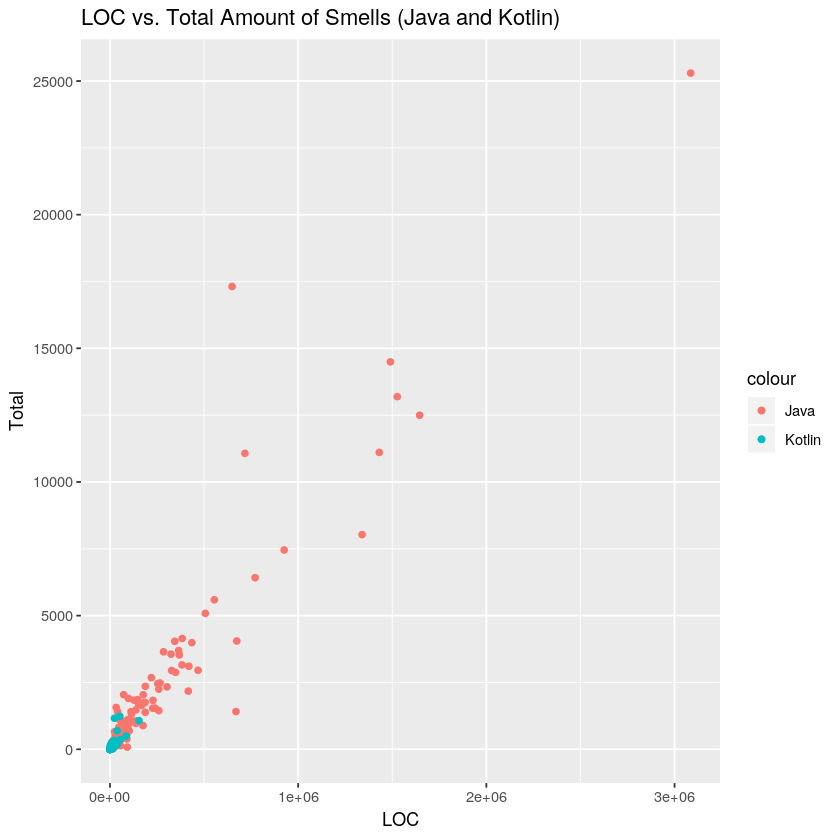

In [15]:
LOC <- df_java_projects_training$LOC
Total <- df_java_projects_training$Total

ggplot() +
  geom_point(data=df_java_projects_training, aes(LOC, Total, color= 'Java')) +
  geom_point(data=df_kotlin_projects_training, aes(df_kotlin_projects_training$LOC, df_kotlin_projects_training$Total, color= 'Kotlin')) + ggtitle("LOC vs. Total Amount of Smells (Java and Kotlin)")

# Multidimensional

## Java

In [16]:
fit <- lm(Total ~ LOC + Stargazers + Contributors + Issues + Lifespan, df_java_projects_training)

In [17]:
summary(fit)


Call:
lm(formula = Total ~ LOC + Stargazers + Contributors + Issues + 
    Lifespan, data = df_java_projects_training)

Residuals:
    Min      1Q  Median      3Q     Max 
-4266.8   -90.5   -34.6     5.8 11728.9 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -3.3852670 93.4249598  -0.036   0.9711    
LOC           0.0084549  0.0002428  34.817   <2e-16 ***
Stargazers   -0.0119242  0.0092200  -1.293   0.1967    
Contributors -0.2191611  0.3213385  -0.682   0.4956    
Issues        0.4270415  0.2076154   2.057   0.0404 *  
Lifespan      0.0520906  0.0557150   0.935   0.3504    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 751.3 on 394 degrees of freedom
Multiple R-squared:  0.8901,	Adjusted R-squared:  0.8887 
F-statistic: 638.2 on 5 and 394 DF,  p-value: < 2.2e-16


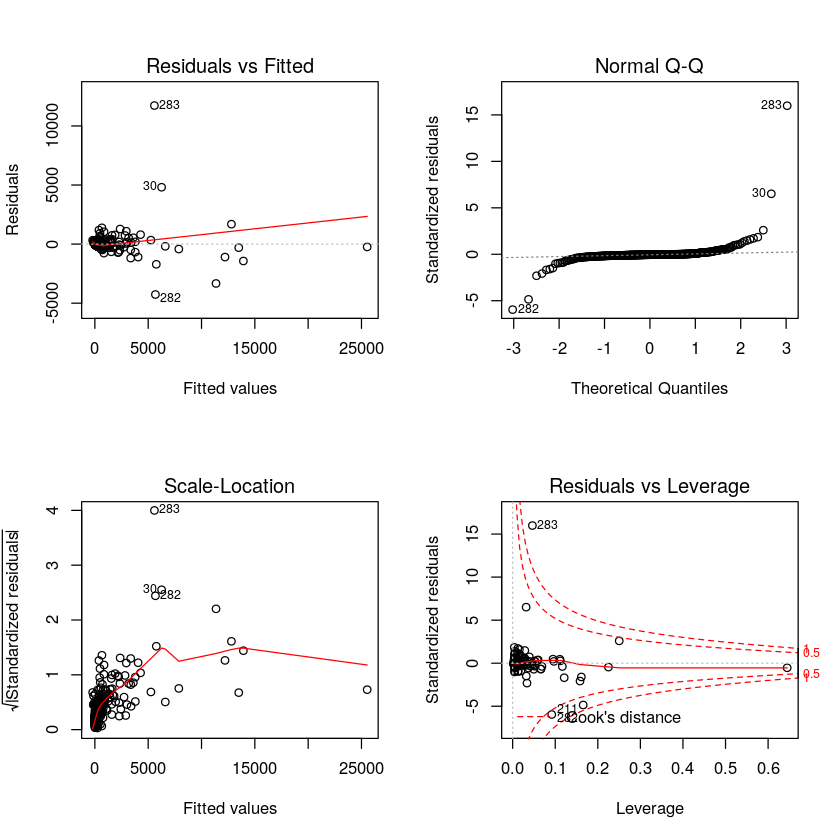

In [18]:
par(mfrow=c(2,2))
plot(fit)

## Kotlin

In [19]:
fit <- lm(Total ~ LOC + Stargazers + Contributors + Issues + Lifespan, df_kotlin_projects_training)

In [20]:
summary(fit)


Call:
lm(formula = Total ~ LOC + Stargazers + Contributors + Issues + 
    Lifespan, data = df_kotlin_projects_training)

Residuals:
    Min      1Q  Median      3Q     Max 
-215.51   -9.07   -2.08    1.83  949.09 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -4.0157268  6.6627738  -0.603    0.547    
LOC           0.0081599  0.0003896  20.944   <2e-16 ***
Stargazers   -0.0029420  0.0021764  -1.352    0.177    
Contributors -0.0529870  0.2664425  -0.199    0.842    
Issues        0.1429416  0.1229828   1.162    0.246    
Lifespan      0.0064224  0.0083153   0.772    0.440    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 72.56 on 394 degrees of freedom
Multiple R-squared:  0.6129,	Adjusted R-squared:  0.608 
F-statistic: 124.8 on 5 and 394 DF,  p-value: < 2.2e-16


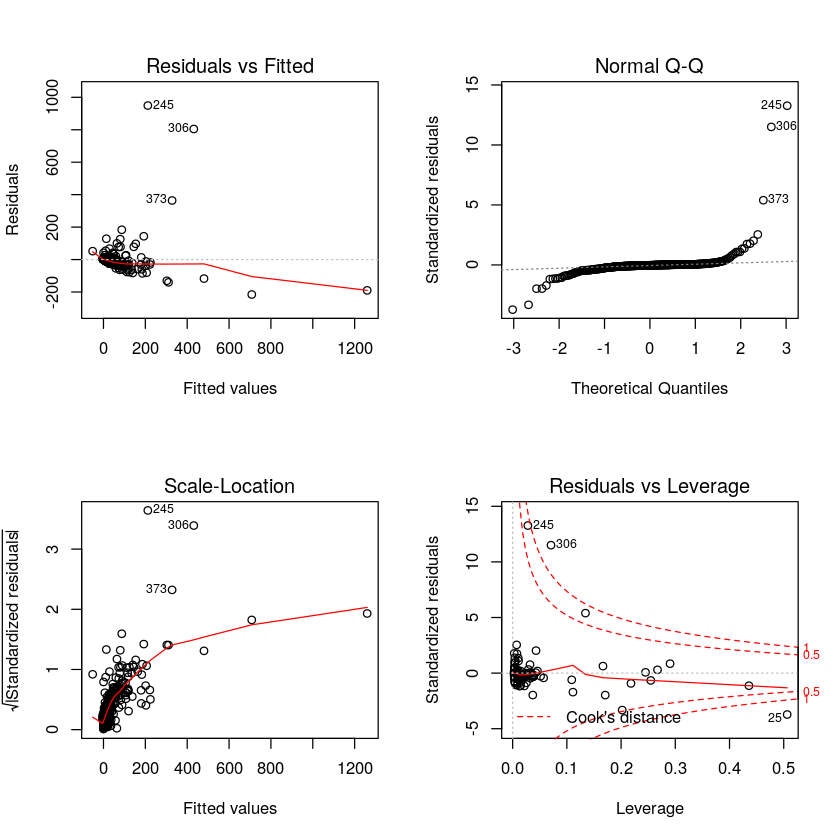

In [21]:
par(mfrow=c(2,2))
plot(fit)

# Box Cox Transformation

## Multidimensional (Java)

In [22]:
library('MASS')

In [23]:
df_java_projects_training <- df_java_projects_training[df_java_projects_training$Total != 0, ]
df_java_projects_training <- df_java_projects_training[df_java_projects_training$Lifespan != 0, ]
df_java_projects_training <- df_java_projects_training[df_java_projects_training$Issues != 0, ]
df_java_projects_training <- df_java_projects_training[df_java_projects_training$Contributors != 0, ]
df_java_projects_training <- df_java_projects_training[df_java_projects_training$Stargazers != 0, ]

lambda,lik
0.14141414,-1301.560
0.10101010,-1301.790
0.18181818,-1303.468
0.06060606,-1304.177
0.22222222,-1307.500
0.02020202,-1308.751
0.26262626,-1313.670
-0.02020202,-1315.546
0.30303030,-1322.012
-0.06060606,-1324.592


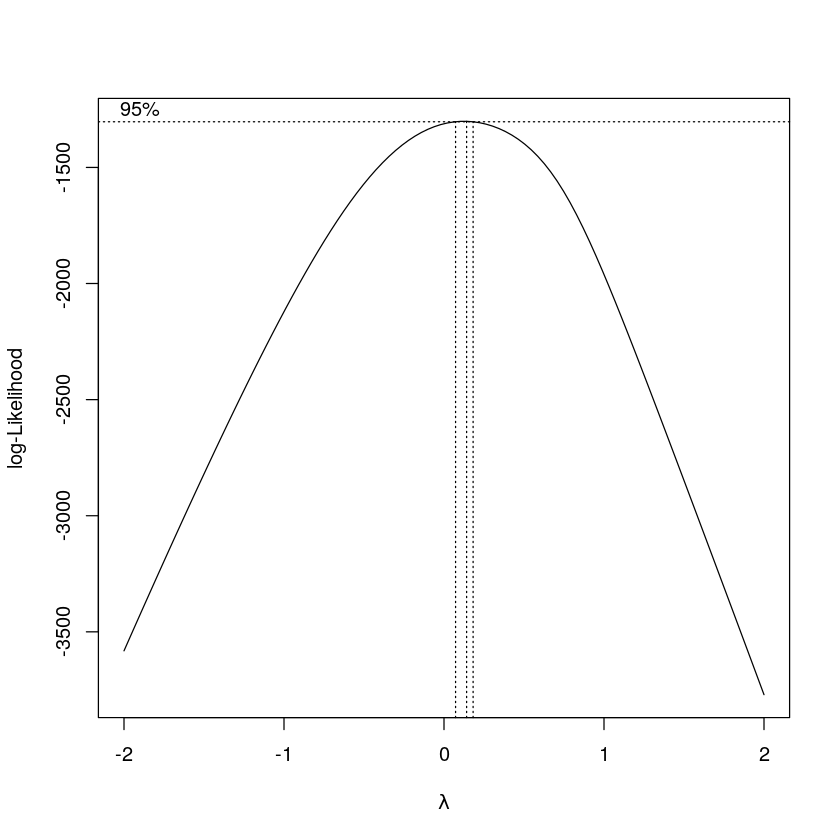

In [24]:
b=boxcox(Total~Lifespan + Issues + LOC + Contributors + Stargazers, data=df_java_projects_training)
lambda=b$x
lik=b$y
bc=cbind(lambda,lik)
bc[order(-lik),]

## Multidimensional (Kotlin)

In [25]:
df_kotlin_projects_training <- df_kotlin_projects_training[df_kotlin_projects_training$Total != 0, ]
df_kotlin_projects_training <- df_kotlin_projects_training[df_kotlin_projects_training$Lifespan != 0, ]
df_kotlin_projects_training <- df_kotlin_projects_training[df_kotlin_projects_training$Issues != 0, ]
df_kotlin_projects_training <- df_kotlin_projects_training[df_kotlin_projects_training$Contributors != 0, ]
df_kotlin_projects_training <- df_kotlin_projects_training[df_kotlin_projects_training$Stargazers != 0, ]

lambda,lik
0.10101010,-857.4145
0.06060606,-857.5357
0.14141414,-858.6224
0.02020202,-858.9026
0.18181818,-861.2650
-0.02020202,-861.4381
-0.06060606,-865.0766
0.22222222,-865.4544
-0.10101010,-869.7638
0.26262626,-871.3186


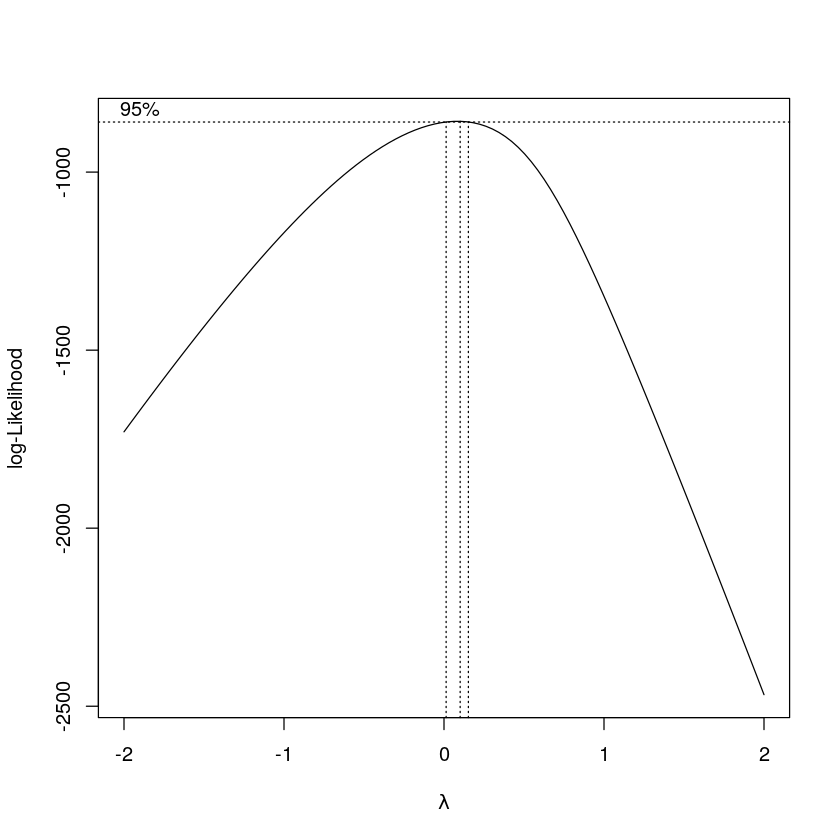

In [26]:
b=boxcox(Total~Lifespan + Issues + LOC + Contributors + Stargazers, data=df_kotlin_projects_training)
lambda=b$x
lik=b$y
bc=cbind(lambda,lik)
bc[order(-lik),]

## LOC vs. Smells (Java)

In [27]:
box_cox = function(y, x, data){ 
  b=boxcox(y~x, data=data)
  lambda=b$x
  lik=b$y
  bc=cbind(lambda,lik)
  bc[order(-lik),]
}

In [28]:
df_java_projects_training <- df_java_projects_training[df_java_projects_training$Total != 0, ]

[1] "x=LOC, y=Total, df=df_java_projects_training"


lambda,lik
0.10101010,-1328.198
0.14141414,-1328.209
0.06060606,-1330.218
0.18181818,-1330.223
0.22222222,-1334.218
0.02020202,-1334.310
0.26262626,-1340.194
-0.02020202,-1340.516
0.30303030,-1348.175
-0.06060606,-1348.876


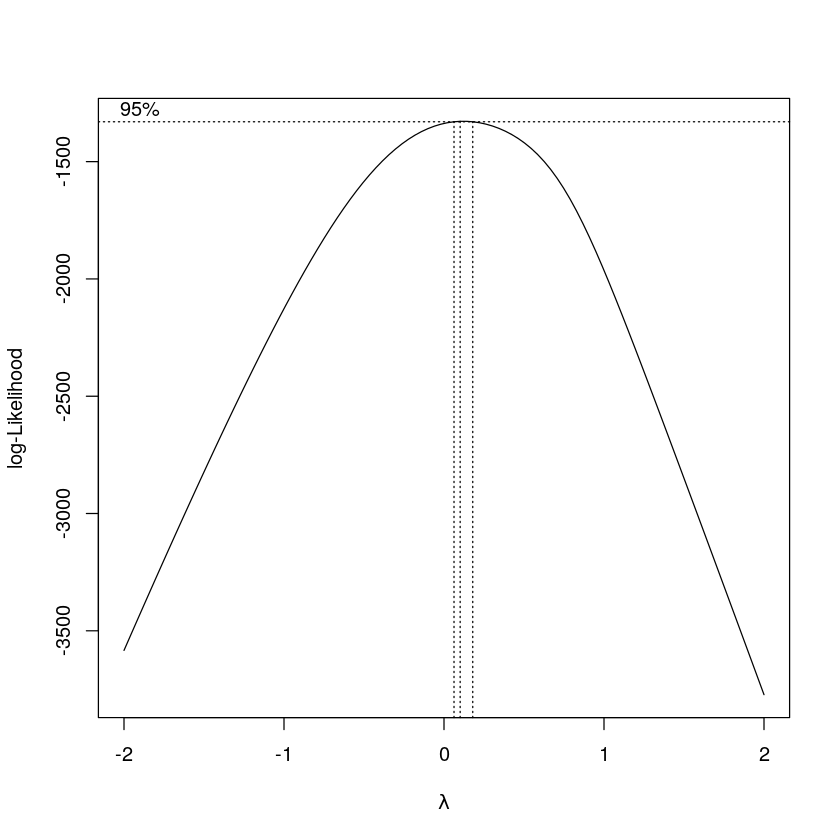

In [29]:
print('x=LOC, y=Total, df=df_java_projects_training')
box_cox(df_java_projects_training$Total, df_java_projects_training$LOC, df_java_projects_training)

## LOC vs. Smells (Kotlin)

In [30]:
df_kotlin_projects_training <- df_kotlin_projects_training[df_kotlin_projects_training$Total != 0, ]

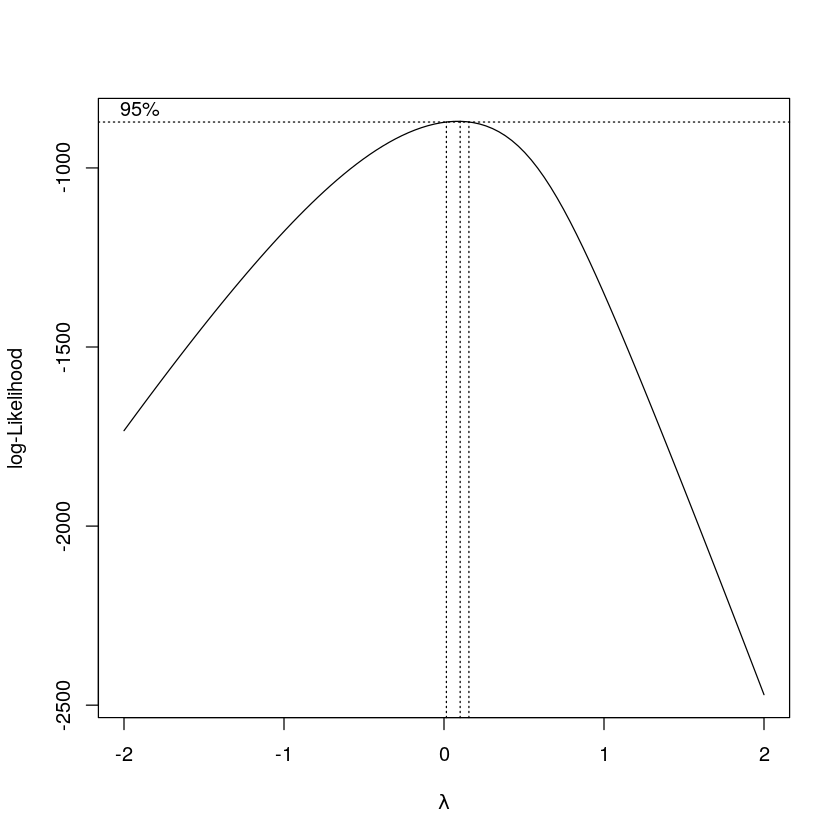

In [31]:
b_kotlin=boxcox(Total ~ LOC, data=df_kotlin_projects_training)

In [32]:
lambda=b_kotlin$x
lik=b_kotlin$y
bc=cbind(lambda,lik)
bc[order(-lik),]

lambda,lik
0.10101010,-869.9113
0.06060606,-870.1131
0.14141414,-870.9752
0.02020202,-871.5034
0.18181818,-873.4040
-0.02020202,-874.0121
0.22222222,-877.3034
-0.06060606,-877.5797
-0.10101010,-882.1575
0.26262626,-882.7977


## Applying the Results of the Box Cox Transformation

In [33]:
df_java_projects_training$Total <- log(df_java_projects_training$Total)
df_kotlin_projects_training$Total <- log(df_kotlin_projects_training$Total)

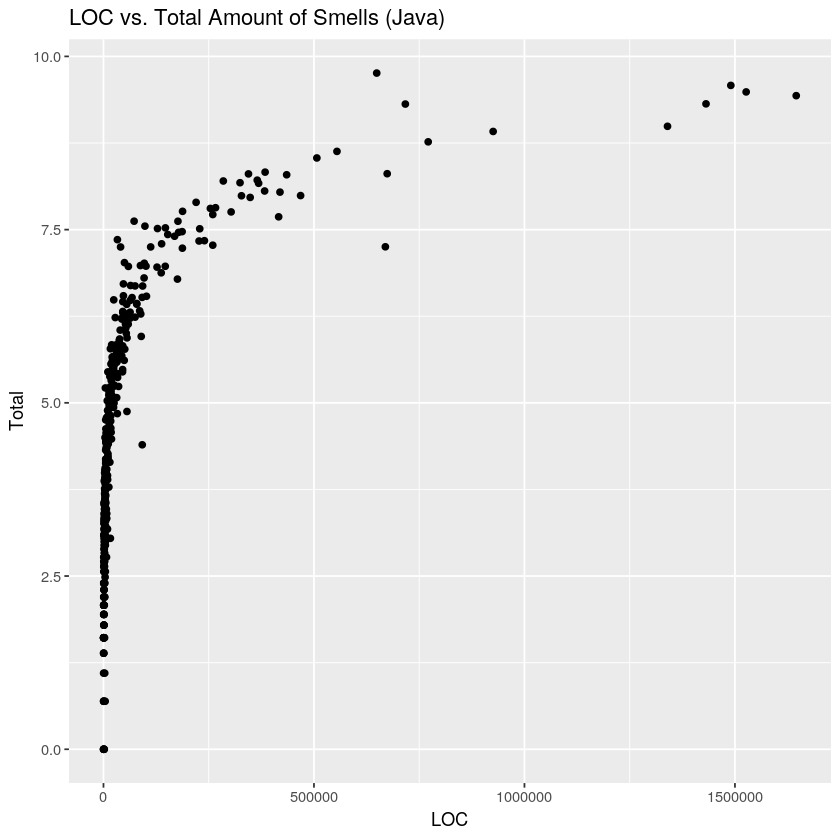

In [34]:
require(methods)
p <- ggplot(df_java_projects_training, aes(x = LOC, y = Total)) + geom_point()  + ggtitle("LOC vs. Total Amount of Smells (Java)")
print(p)

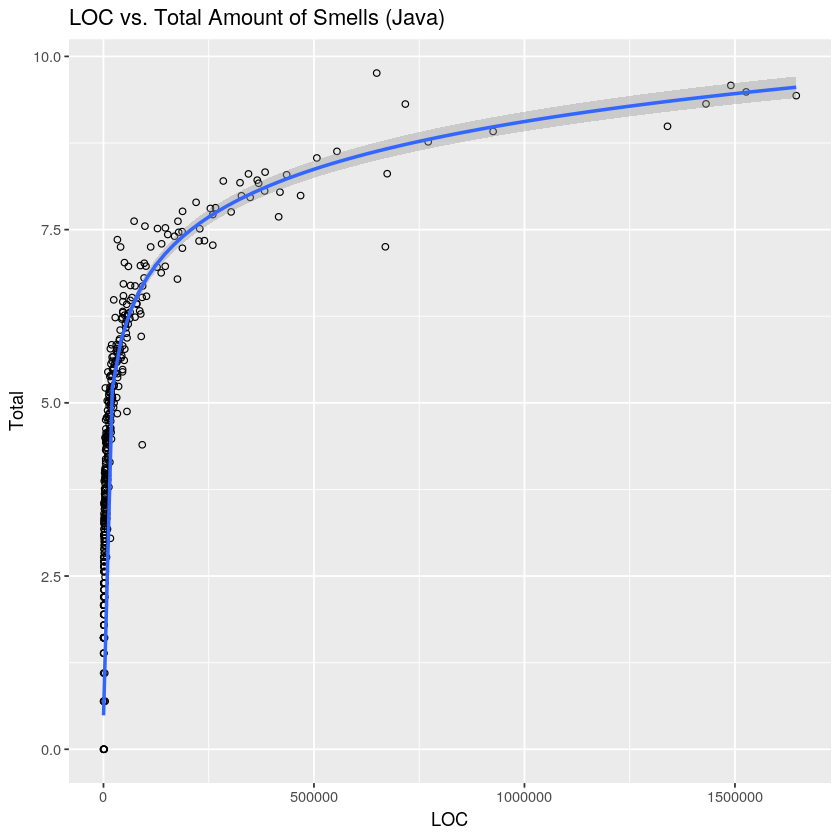

In [35]:
ggplot(df_java_projects_training, aes(LOC, Total))+
  geom_point(shape = 1) + stat_smooth(method = "lm", formula = y ~ log(x))  + ggtitle("LOC vs. Total Amount of Smells (Java)")

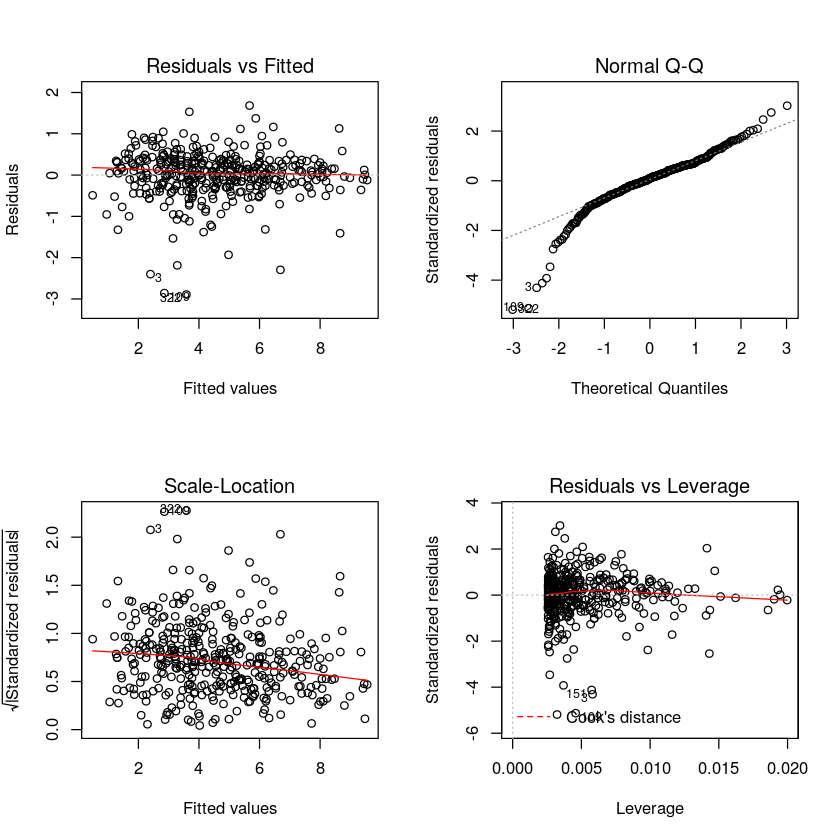

In [36]:
fit <- lm(Total ~ log(LOC), data=df_java_projects_training)
par(mfrow=c(2,2))
plot(fit)

In [37]:
rownames(df_java_projects_training) <- NULL

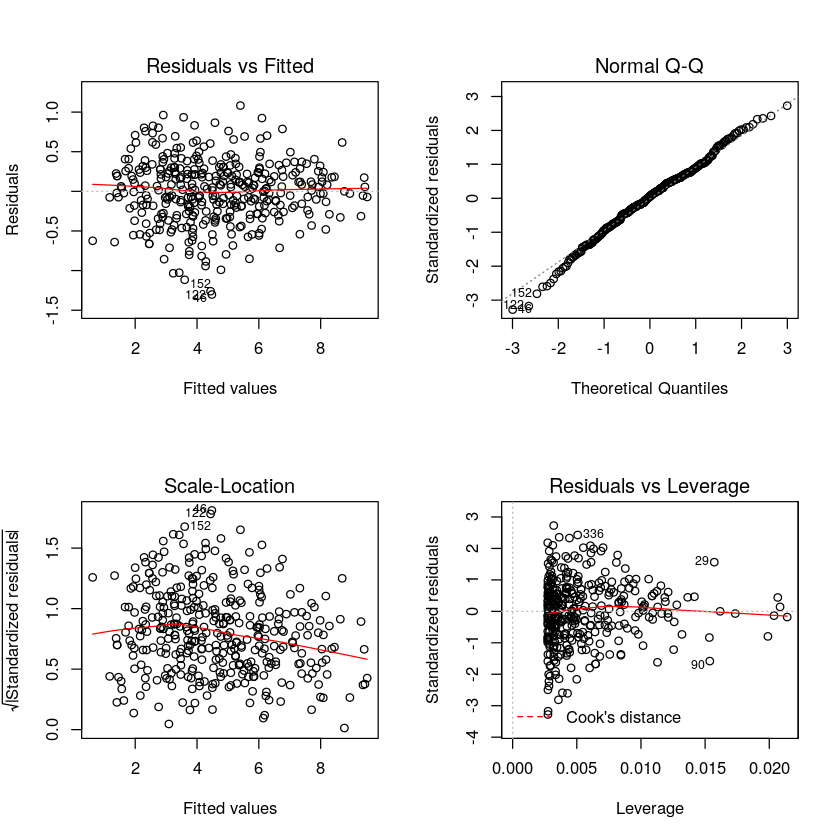

In [38]:
df_java_projects_training <- df_java_projects_training[-c(313, 106, 145, 3, 86, 243, 16, 81, 114, 248, 234, 274, 113, 48, 290, 109, 262, 164, 232, 275, 293, 347),]
fit <- lm(Total ~ log(LOC), data=df_java_projects_training)
par(mfrow=c(2,2))
plot(fit)

In [39]:
# Shapiro-Wilk test
#fit <- lm(df_java_projects_training$Total ~ log(df_java_projects_training$LOC))
#residuals <- resid(fit)
#shapiro.test(residuals)
#hist(residuals)

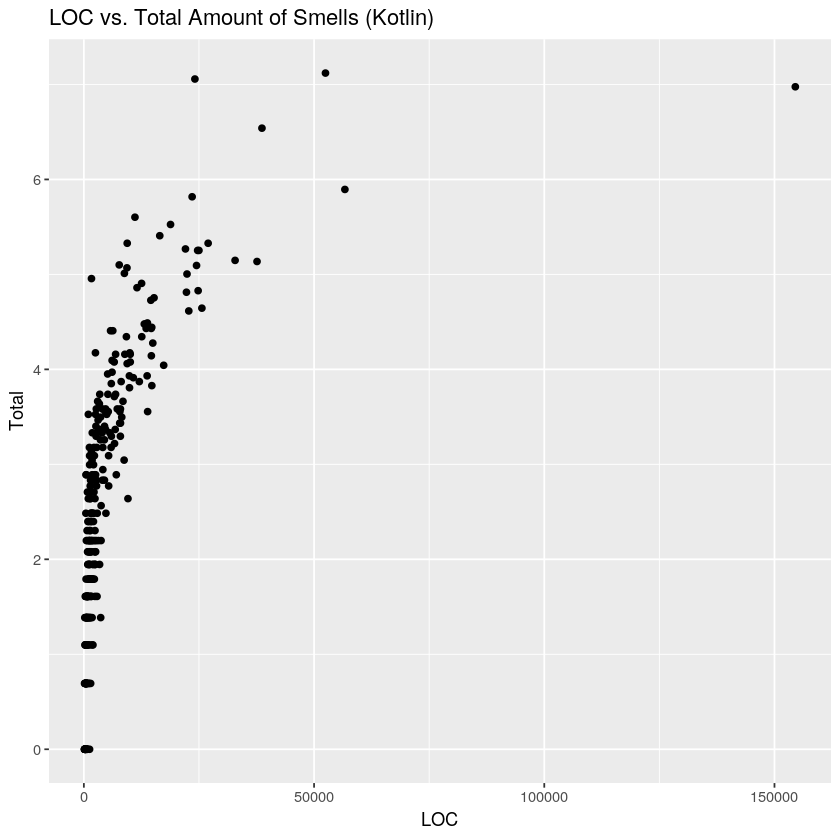

In [40]:
require(methods)
p <- ggplot(df_kotlin_projects_training, aes(x = LOC, y = Total)) + geom_point()  + ggtitle("LOC vs. Total Amount of Smells (Kotlin)")
print(p)

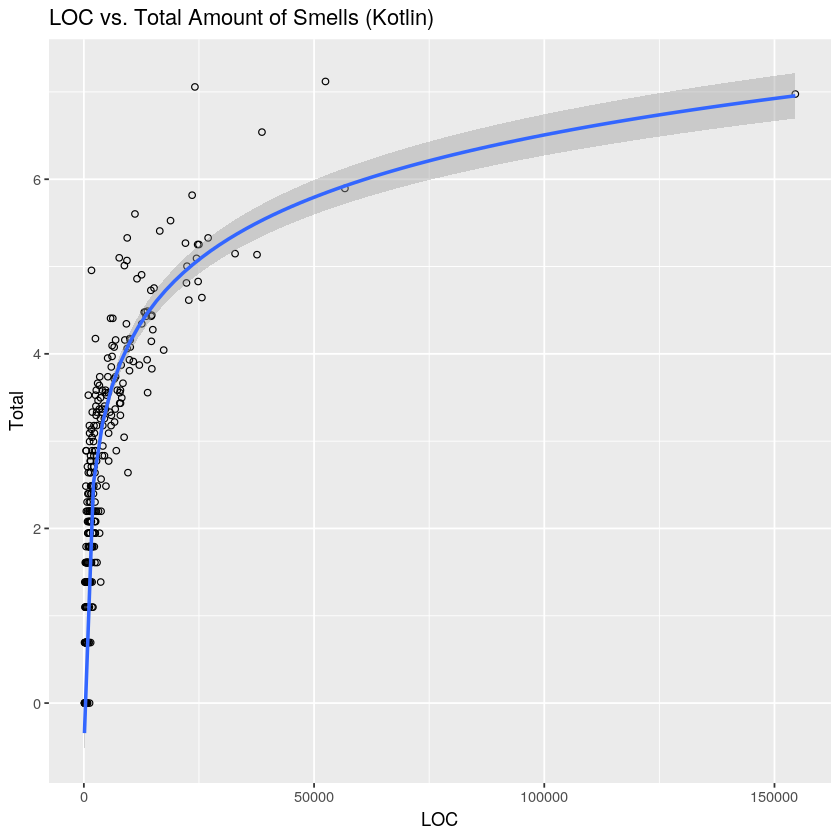

In [41]:
ggplot(df_kotlin_projects_training, aes(LOC, Total))+
  geom_point(shape = 1) + stat_smooth(method = "lm", formula = y ~ log(x))  + ggtitle("LOC vs. Total Amount of Smells (Kotlin)")

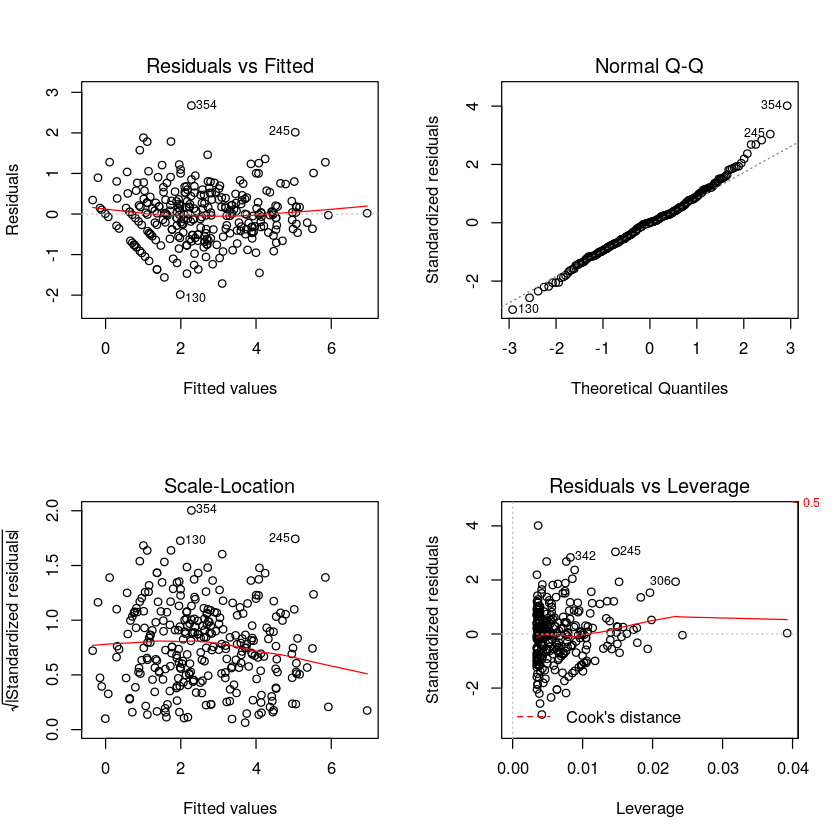

In [42]:
fit <- lm(Total ~ log(LOC), data=df_kotlin_projects_training)
par(mfrow=c(2,2))
plot(fit)

In [43]:
rownames(df_kotlin_projects_training) <- NULL

In [44]:
df_kotlin_projects_training <- df_kotlin_projects_training[-c(388, 354, 326, 356),]

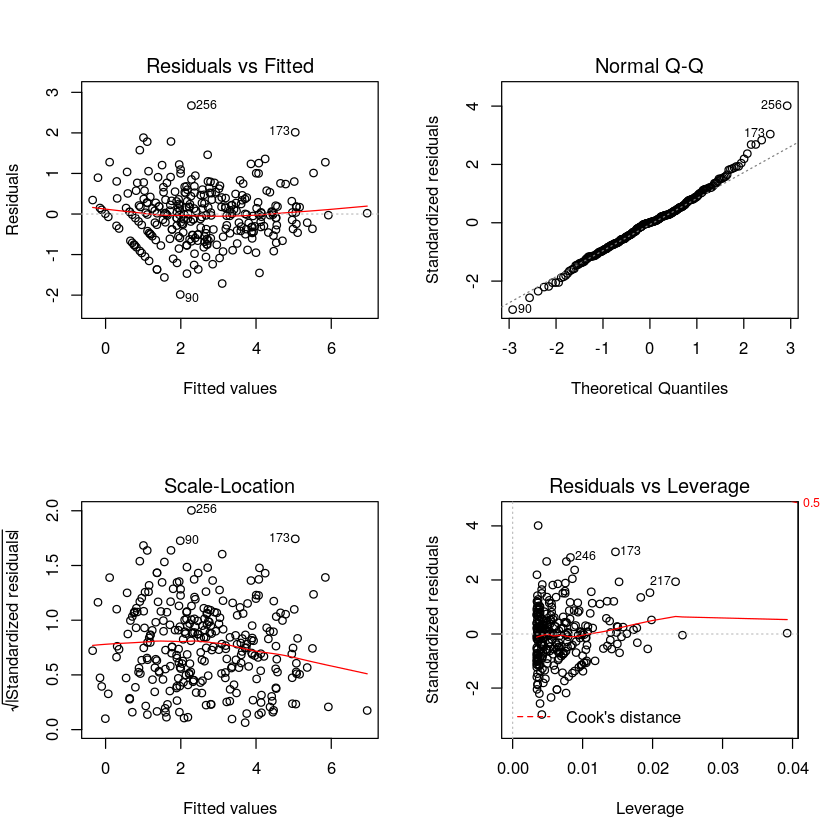

In [45]:
fit <- lm(Total ~ log(LOC), data=df_kotlin_projects_training)
par(mfrow=c(2,2))
plot(fit)

# ANCOVA Analysis (LOC vs Total)

In [46]:
df_java_projects_training["Language"] <- 1
df_kotlin_projects_training["Language"] <- 0
java_kotlin_df = data.frame(rbind(cbind(df_java_projects_training$Language, df_java_projects_training$Total, df_java_projects_training$LOC),cbind(df_kotlin_projects_training$Language, df_kotlin_projects_training$Total, df_kotlin_projects_training$LOC)))
java_kotlin_df <- setNames(java_kotlin_df, c("Language","Total","LOC"))

In [47]:
head(java_kotlin_df)

Language,Total,LOC
1,4.787492,7259
1,4.430817,9987
1,6.192362,54505
1,3.988984,2795
1,3.332205,3342
1,2.397895,873


In [48]:
rownames(test) <- NULL

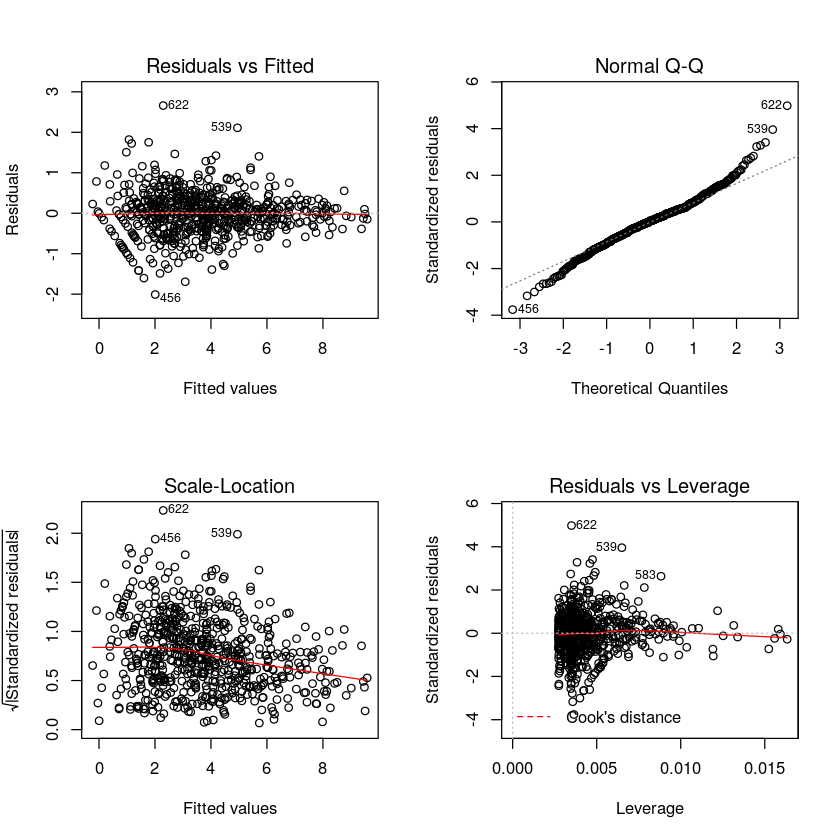

In [49]:
fit <- lm(Total ~ Language +  log(LOC), data= java_kotlin_df)
par(mfrow=c(2,2))
plot(fit)

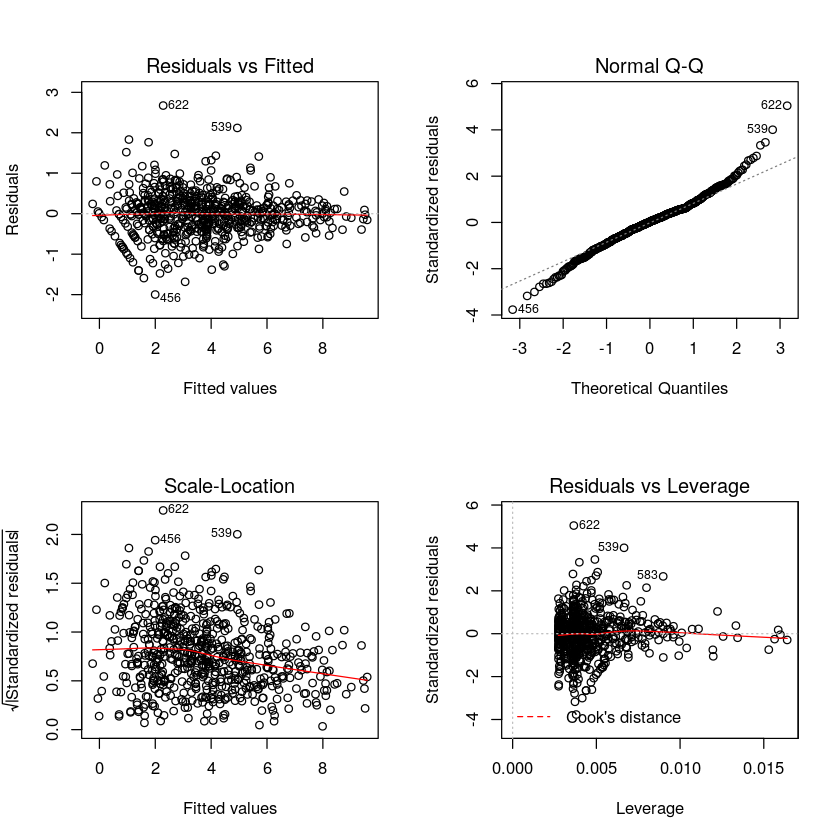

In [50]:
java_kotlin_df <- java_kotlin_df[-c(589, 516, 486, 649, 680, 597, 367, 648, 697, 543, 481, 558, 507, 645),]
fit <- lm(Total ~ Language +  log(LOC), data= java_kotlin_df)
par(mfrow=c(2,2))
plot(fit)

In [51]:
java_kotlin_df$Language <- factor(java_kotlin_df$Language, label = c("Kotlin", "Java"))

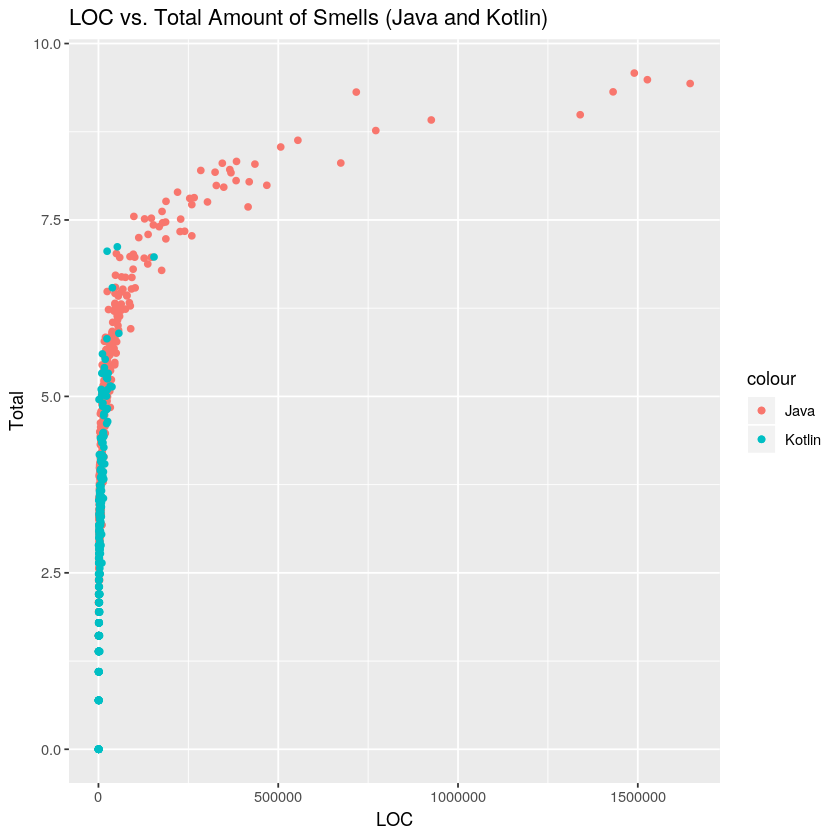

In [52]:
LOC <- df_java_projects_training$LOC
Total <- df_java_projects_training$Total

ggplot() +
  geom_point(data=df_java_projects_training, aes(LOC, Total, color= 'Java')) +
  geom_point(data=df_kotlin_projects_training, aes(df_kotlin_projects_training$LOC, df_kotlin_projects_training$Total, color= 'Kotlin')) + ggtitle("LOC vs. Total Amount of Smells (Java and Kotlin)")

In [53]:
java_kotlin_total <- java_kotlin_df$Total
java_kotlin_language <- java_kotlin_df$Language
java_kotlin_loc <- java_kotlin_df$LOC
aggregate(java_kotlin_total, by=list(java_kotlin_language), FUN=mean)

Group.1,x
Kotlin,2.594058
Java,4.632400


In [54]:
result_of_ancova <- aov(java_kotlin_total ~ java_kotlin_language +  log(java_kotlin_loc), data = java_kotlin_df)
summary(result_of_ancova)

                      Df Sum Sq Mean Sq F value Pr(>F)    
java_kotlin_language   1  656.4   656.4    2328 <2e-16 ***
log(java_kotlin_loc)   1 1796.0  1796.0    6369 <2e-16 ***
Residuals            641  180.8     0.3                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [58]:
effect("java_kotlin_language", result_of_ancova)


 java_kotlin_language effect
java_kotlin_language
  Kotlin     Java 
5.519638 5.988236 

In [59]:
exp(5.379162)

[1] 216.8405

In [60]:
exp(5.887775)

[1] 360.6021

# ANCOVA Analysis (Multidimensional)

In [61]:
df_java_projects_training["Language"] <- 1
df_kotlin_projects_training["Language"] <- 0
java_kotlin_mul = data.frame(rbind(cbind(df_java_projects_training$Language, df_java_projects_training$Total, df_java_projects_training$Lifespan, df_java_projects_training$Issues, df_java_projects_training$LOC, df_java_projects_training$Contributors, df_java_projects_training$Stargazers),cbind(df_kotlin_projects_training$Language, df_kotlin_projects_training$Total, df_kotlin_projects_training$Lifespan, df_kotlin_projects_training$Issues, df_kotlin_projects_training$LOC, df_kotlin_projects_training$Contributors, df_kotlin_projects_training$Stargazers)))
java_kotlin_mul <- setNames(java_kotlin_mul, c("Language","Total", "Lifespan", "Issues","LOC", "Contributors", "Stargazers"))

In [62]:
java_kotlin_mul <- java_kotlin_mul[java_kotlin_mul$Lifespan != 0, ]
java_kotlin_mul <- java_kotlin_mul[java_kotlin_mul$Issues != 0, ]
java_kotlin_mul <- java_kotlin_mul[java_kotlin_mul$LOC != 0, ]
java_kotlin_mul <- java_kotlin_mul[java_kotlin_mul$Contributors != 0, ]
java_kotlin_mul <- java_kotlin_mul[java_kotlin_mul$Stargazers != 0, ]

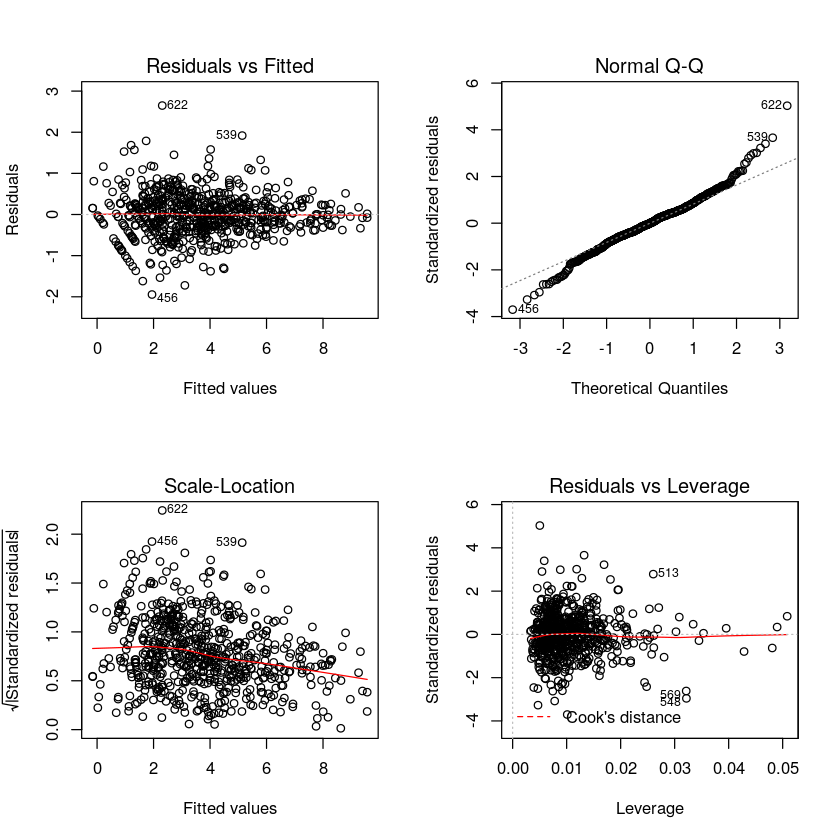

In [63]:
fit <- lm(Total ~ Language + log(Lifespan) + log(Issues) + log(LOC) + log(Contributors) + log(Stargazers), data= java_kotlin_mul)
par(mfrow=c(2,2))
plot(fit)

In [64]:
rownames(java_kotlin_mul) <- NULL

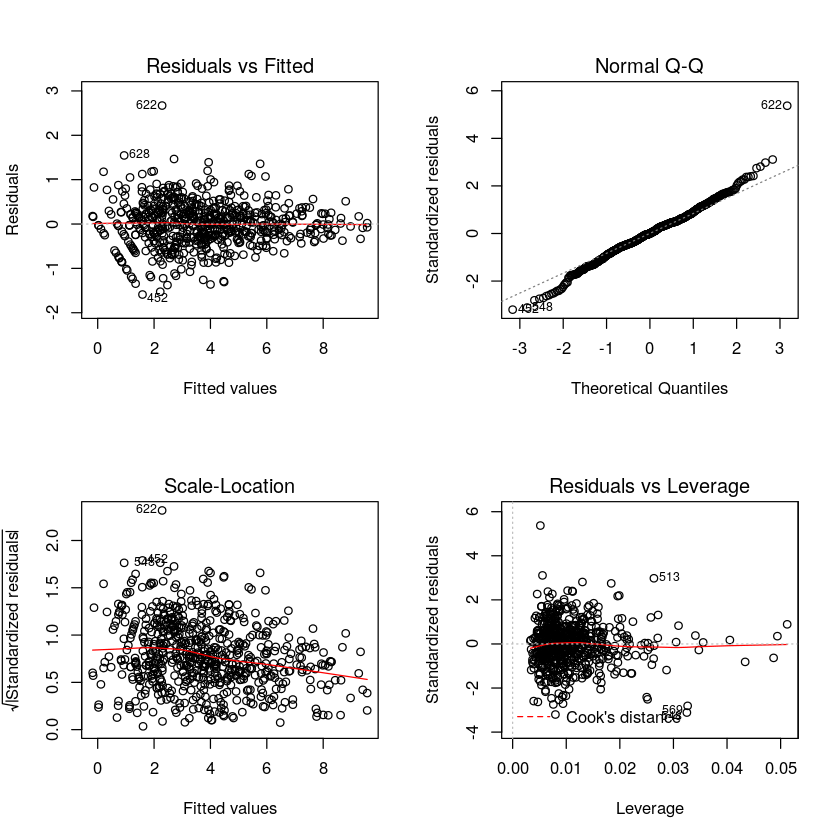

In [65]:
fit <- lm(Total ~ Language + log(Lifespan)+log(Issues) + log(LOC)+log(Contributors) + log(Stargazers), data= java_kotlin_mul[-c(486, 456, 539, 547, 612, 499, 473, 367, 627),])
par(mfrow=c(2,2))
plot(fit)

In [66]:
java_kotlin_mul <- java_kotlin_mul[-c(486, 456, 539, 547, 612, 499, 473, 367, 627),]

In [67]:
java_kotlin_mul$Language <- factor(java_kotlin_mul$Language, label = c("Kotlin", "Java"))

In [68]:
aggregate(java_kotlin_mul$Total, by=list(java_kotlin_mul$Language), FUN=mean)

Group.1,x
Kotlin,2.587916
Java,4.632400


In [69]:
java_kotlin_mul_lang <- java_kotlin_mul$Language

In [70]:
result_of_ancova <- aov(Total ~ java_kotlin_mul_lang + log(Lifespan) + log(Issues) + log(LOC) + log(Contributors) + log(Stargazers), data = java_kotlin_mul)
summary(result_of_ancova)

                      Df Sum Sq Mean Sq  F value Pr(>F)    
java_kotlin_mul_lang   1  664.4   664.4 2674.212 <2e-16 ***
log(Lifespan)          1  163.2   163.2  656.982 <2e-16 ***
log(Issues)            1  232.9   232.9  937.397 <2e-16 ***
log(LOC)               1 1391.1  1391.1 5599.005 <2e-16 ***
log(Contributors)      1    1.2     1.2    4.700 0.0305 *  
log(Stargazers)        1    0.0     0.0    0.109 0.7418    
Residuals            640  159.0     0.2                    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [71]:
effect("java_kotlin_mul_lang", result_of_ancova)


 java_kotlin_mul_lang effect
java_kotlin_mul_lang
  Kotlin     Java 
5.613638 5.964032 